In [54]:
import os
from PIL import Image
from io import BytesIO
import numpy as np

class IOSImage():
    def __init__(self, file_name):
        """
            class for extracting and store all image layers from ios-image 
            e.g. it retrieves depth-map data
        """

        # every layer starts with 0xff, 0xd8 bytes and ends with 0xff, 0xd9 bytes
        self.start_bytes = [0xff, 0xd8]
        self.end_bytes = [0xff, 0xd9]

        with open('1.jpg', 'rb') as f:
            self.byte_str = f.read()

        self.layers = self.extract_layers()
        self.depthmap = self.layers[2]
        self.image = self.layers[0]

    def extract_layers(self):
        """
            extract all layers from image file
        """

        # get all layers as byte-string
        image_cnt, old_byte = 0, 0

        layers_bytes = {}
        stuck_of_images = []
        for byte in self.byte_str:

            if (old_byte == self.start_bytes[0]) and (byte == self.start_bytes[1]):
                stuck_of_images.append(image_cnt)
                layers_bytes[image_cnt] = [old_byte]
                image_cnt += 1


            if (old_byte == self.end_bytes[0]) and (byte == self.end_bytes[1]):
                stuck_of_images.pop()
                

            for image_ind in stuck_of_images:
                layers_bytes[image_ind] += [byte]
            
            old_byte = byte

        # transform all layers to np.ayrray's
        layers_arrays = []
        for _, layer_bytes in layers_bytes.items():
            layers_arrays.append(self.bytes_to_arr(layer_bytes))

        return layers_arrays

    def save(self, path=''):
        """
            save all layers as image files
        """

        for image_arr in self.layers:
            Image.fromarray(image_arr).save('image_layer_{}.jpg'.format(image_ind))

    def bytes_to_arr(self, byte_str):
        """
            transform byte-string with image to numpy-array
        """

        depthmap_bytes = bytes(byte_str)

        stream = BytesIO()
        stream.write(depthmap_bytes)

        depthmap = Image.open(stream)
        depthmap_arr = np.array(depthmap)

        stream.close()
        return depthmap_arr


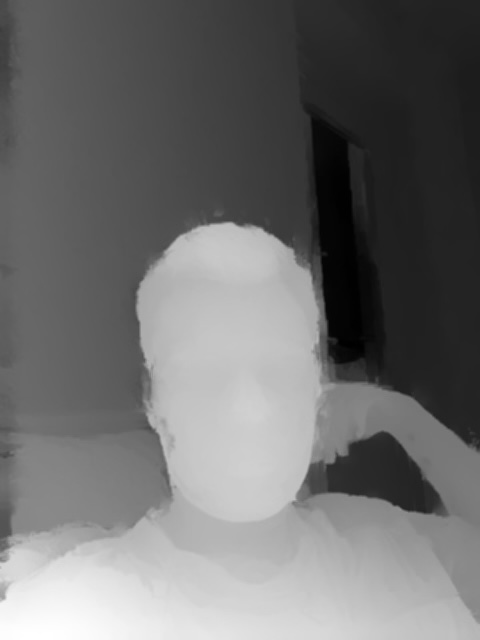

In [55]:
#example of using:

ios_image = IOSImage('1.jpg')
Image.fromarray(ios_image.layers[2])